**Análise**

Para comentar:
países de um bloco são tipicamente mais “avançados” que os de outro bloco?

Para codar:
bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) 
em uma figura, P(avançado|bloco) e os intervalos de confiança calculados


In [1]:
# ---------- Probabilidade do país ser avançado dado o bloco:

mercosul = [27, 173, 231, 8]
nafta = [36, 143, 229]

#Mercosul:
p_avancado_given_m = (4 / len(mercosul)) * 100
#NAFTA:
p_avancado_given_n = (2 / len(nafta)) * 100

print(f' Probabilidade do país ser avancado dado que é da NAFTA {p_avancado_given_m:.4}%')
print(f' Probabilidade do país ser do avancado dado que é do Mercosul {p_avancado_given_n:.4}%')
print('')

 Probabilidade do país ser avancado dado que é da NAFTA 100.0%
 Probabilidade do país ser do avancado dado que é do Mercosul 66.67%



In [35]:
# ----------- Bootstraping com 90% de confianca para P(avançado|bloco) 

import scipy.stats as stat
import numpy as np
import pandas as pd

df = pd.read_csv('csv/jobs.csv', sep=',', encoding='latin1', decimal='.')
df = df.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df = df.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

mexico = df.iloc[143]
usa = df.iloc[229]
canada = df.iloc[36]

paraguay = df.iloc[173]
uruguay = df.iloc[231]
brasil = df.iloc[27]
argentina = df.iloc[8]


# em ordem: Brazil Paraguay Uruguay Argentina Canada Mexico UnitedStates 
# 1 = avançado, 0 = nao avançado
mercosul = [
    float(paraguay['2016 [YR2016]']) - float(paraguay['1991 [YR1991]']),
    float(uruguay['2016 [YR2016]']) - float(uruguay['1991 [YR1991]']),
    float(brasil['2016 [YR2016]']) - float(brasil['1991 [YR1991]']),
    float(argentina['2016 [YR2016]']) - float(argentina['1991 [YR1991]'])
    ]

nafta = [
    float(mexico['2016 [YR2016]']) - float(mexico['1991 [YR1991]']),
    float(usa['2016 [YR2016]']) - float(usa['1991 [YR1991]']),
    float(canada['2016 [YR2016]']) - float(canada['1991 [YR1991]'])
]



amostras = mercosul
amostras_ = np.random.choice(amostras, size=90, replace=True)

amostras2 = nafta
amostras2_ = np.random.choice(amostras2, size=90, replace=True)

media_mercosul = np.std(amostras_)
media_nafta = np.std(amostras2_)




mercosul_ = (mercosul,)
nafta_ = (nafta,)

resMerc = stat.bootstrap(mercosul_, np.mean, confidence_level=0.90)
resNaft = stat.bootstrap(nafta_, np.mean, confidence_level=0.90)

print(resMerc, resNaft)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.796998977661147, high=3.3570013046265217), standard_error=0.7771732192874414) BootstrapResult(confidence_interval=ConfidenceInterval(low=-2.9019966125487926, high=1.4490000406900663), standard_error=1.315170386011988)


In [54]:
# ----------- Figura do bootstraping para P(avançado|bloco) com intervalos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ----------------------------------- #

dici1 = {'mercosul': mercosul}
dici2 = {'nafta': nafta}

dicionario1 = pd.DataFrame(dici1)
dicionario2 = pd.DataFrame(dici2)

sns.barplot(x=dicionario1, y=dicionario1, color='b')
sns.barplot(x=dicionario2, y=dicionario2, color='r')

plt.ylabel('Quantidade de avanço (trabalhadores ativos)')
plt.xlabel('Blocos')
plt.show()




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Discussão:

Levando em consideração os intervalos de confiança, seria seguro dizer que países de um bloco são tipicamente mais “avançados” que os de outro bloco em relação ao indicador que você escolheu? 

------------------------------------------------------------------------------------------------

**Review da APS3**

Feedback: 
- Falta calcular a acurácia
- Falta calcular P(bloco | não-avançado) para completar o preditor Bayesiano
- Não fui capaz de localizar a figura mostrando as distribuições dos países nas categorias avançado e atrasado

**Análise**

Os blocos de interesse escolhidos para essa análise são: o NAFTA, que foi criado para eliminar barreiras alfandegárias entre os paises norte americanos; e o Mercosul, que foi criado para estabelecer uma zona de livre comércio entre países vizinhos. 

Para analizarmos esses países integrantes, decidimos olhar a sua taxa de desemprego atual, comparada ao mesmo valor de quando bloco foi formado, para verificar se houve uma evolução. Adicionalmente olhamos esses dados do país em tods os anos comparada a uma media mundial, para remover a possibilidade de um pais ser considerado "avançado" sendo que o mundo como um todo avançou.

As duas teorias atuas que nós acreditamos são: os países se beneficiaram por se juntar ao grupo e portanto foram considerados, em maior parte, "avançado" no teste; Por outro lado, os integrantes podem não ter sofrido diferença significante para ser considerado uma opção benéfica, e que os blocos não tem impacto.

A partir dos nossos dados e pesquisas, é possivel dizer que grande parte dos países se beneficiou desses acordos e avançaram no indicador escolhido (desemprego). Adicionamente, a teoria de que países se beneficiariam por se juntar ao grupo está, muito provavelmente, correta. Portanto, acreditamos que o indicador é um bom preditor de se um pais irá avançar caso entre em um bloco, apesar de não prever qual bloco especifico ele pertence.


<Figure size 640x480 with 0 Axes>

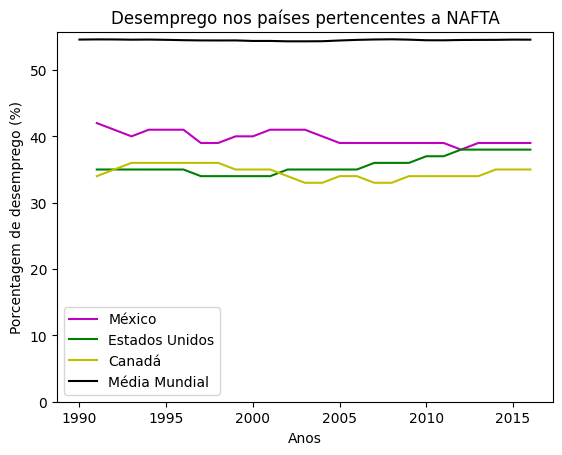

<Figure size 640x480 with 0 Axes>

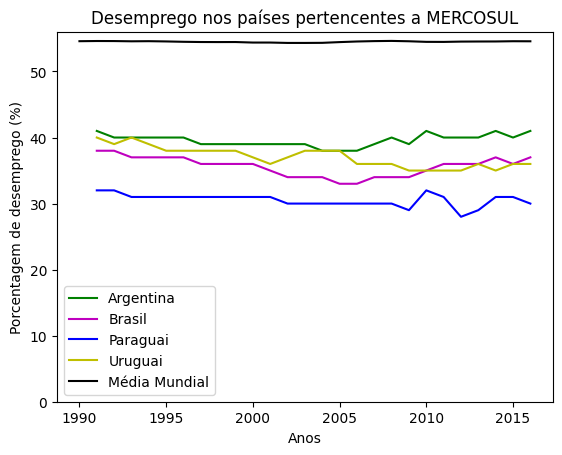

In [22]:
# APS3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ----------------------------------- #

df = pd.read_csv('csv/jobs.csv', sep=',', encoding='latin1', decimal='.')
df = df.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df = df.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

plt.style.use('default')

# ----------------------------------- #

world_mean = []
world_mean_years = []
for column_name in list(df.columns.values):
    if '[YR' in column_name:
        world_mean_years.append(int(float(column_name[0:5])))
        column = df[column_name]
        column = column.astype(float)
        newMean = column.mean()
        world_mean.append(newMean)

# ----------------------------------- #

plt.figure()
fig, ax = plt.subplots()
nafta = [
    # TDOD: coloque os df.iloc[numero] aqui
    df.iloc[143], #mexico
    df.iloc[229], #usa
    df.iloc[36], #canada
]

colors = ['r', 'g', 'b', 'c', 'y', 'm']
colors_dotted = ['r--', 'g--', 'b--', 'c--', 'y--', 'm--']
for paises in nafta:
    
    anos = []
    dados = []
    i=0
    for ano in paises.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            dados.append(100-int(float(paises[ano])))
        i+=1

    # para terem cores diferentes, e tracejado case precise de mais
    if len(colors) != 0:
        chosen = random.randint(0, len(colors) - 1)
        ax.plot(anos, dados, colors[chosen])
        del colors[chosen]
    else:
        chosen = random.randint(0, len(colors_dotted) - 1)
        ax.plot(anos, dados, colors_dotted[chosen])
        del colors_dotted[chosen]

ax.plot(world_mean_years, world_mean, 'k')
ax.legend(['México', 'Estados Unidos', 'Canadá', 'Média Mundial'])
plt.yticks(range(0, 60, 10))
plt.title('Desemprego nos países pertencentes a NAFTA')
plt.xlabel('Anos')
plt.ylabel('Porcentagem de desemprego (%)')
plt.show()

# ----------------------------------- #

plt.figure()
fig, ax = plt.subplots()
mercosul = [
    # TDOD: coloque os df.iloc[numero] aqui
    df.iloc[8], #argentina
    df.iloc[27], #brasil
    df.iloc[173], #paraguai
    df.iloc[231] #uruguai
]

colors = ['r', 'g', 'b', 'c', 'y', 'm']
colors_dotted = ['r--', 'g--', 'b--', 'c--', 'y--', 'm--']
for paises in mercosul:
    
    anos = []
    dados = []
    i=0
    for ano in paises.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            dados.append(100-int(float(paises[ano])))
        i+=1

    # para terem cores diferentes, e tracejado case precise de mais
    if len(colors) != 0:
        chosen = random.randint(0, len(colors) - 1)
        ax.plot(anos, dados, colors[chosen])
        del colors[chosen]
    else:
        chosen = random.randint(0, len(colors_dotted) - 1)
        ax.plot(anos, dados, colors_dotted[chosen])
        del colors_dotted[chosen]

ax.plot(world_mean_years, world_mean, 'k')
ax.legend(['Argentina', 'Brasil', 'Paraguai', 'Uruguai', 'Média Mundial'])
plt.yticks(range(0, 60, 10))
plt.title('Desemprego nos países pertencentes a MERCOSUL')
plt.xlabel('Anos')
plt.ylabel('Porcentagem de desemprego (%)')
plt.show()

Classificação - atrasados e avançados:

**classificados levando em conta os dados da época que o grupo foi criado e o momento atual. Se havia uma taxa menor quando o grupo foi criado e hoje ela se encontra maior, ele é considerado atrasado. Do contrário, é considerado como avançado.

NAFTA:
México: avançado
Estados Unidos: atrasado
Canadá: avançado

Mercosul:
Argentina: avançado
Uruguai: avançado
Brasil: avançado
Paraguai: avançado



In [6]:
#sistema classificador:

mercosul = [27, 173, 231, 8]

for i in mercosul:
    name = df.iloc[i]['Country Name']
    if df.iloc[i]['1991 [YR1991]'] < df.iloc[i]['2016 [YR2016]']:
        print (f'{name} avançado')
    else:
        print (f'{name} atrasado')

nafta = [36, 143, 229]
print()

for i in nafta:
    name = df.iloc[i]['Country Name']
    if df.iloc[i]['1994 [YR1994]'] < df.iloc[i]['2016 [YR2016]']:
        print (f'{name} avançado')
    else:
        print (f'{name} atrasado')



Brazil avançado
Paraguay avançado
Uruguay avançado
Argentina avançado

Canada avançado
Mexico avançado
United States atrasado


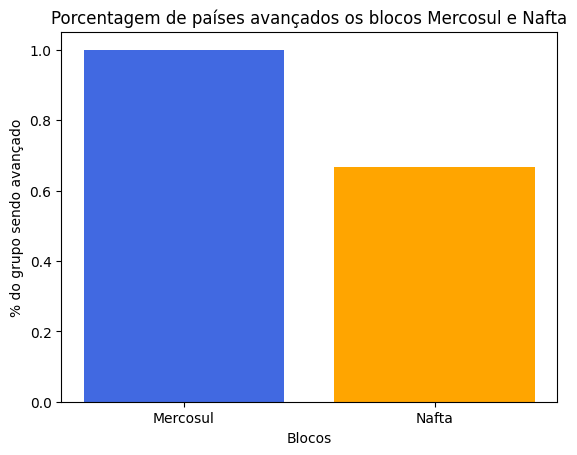

In [24]:
# ---------- grafico mostrando os paises avancados ou nao de cada bloco

# em ordem: Brazil Paraguay Uruguay Argentina Canada Mexico UnitedStates 
mercosul = [1, 1, 1, 1]
nafta = [1, 1, 0]

mercosulMean = sum(mercosul) / len(mercosul)
naftaMean = sum(nafta) / len(nafta)

plt.bar(['Mercosul', 'Nafta'], [mercosulMean, naftaMean], color=('royalblue', 'orange'))
plt.title('Porcentagem de países avançados os blocos Mercosul e Nafta')
plt.ylabel('% do grupo sendo avançado')
plt.xlabel('Blocos')
plt.show()

In [ ]:
# ---------- Probabilidade do país ser avançado dado o bloco:

mercosul = [27, 173, 231, 8]
nafta = [36, 143, 229]

#Mercosul:
p_avancado_given_m = (4 / len(mercosul)) * 100

#NAFTA:
p_avancado_given_n = (2 / len(nafta)) * 100

print(f' Probabilidade do país ser avancado dado que é da NAFTA {p_avancado_given_m:.4}%')
print(f' Probabilidade do país ser do avancado dado que é do Mercosul {p_avancado_given_n:.4}%')
print('')

# ---------- Probabilidade do país ser do bloco dado o avancado:

filter = df['1991 [YR1991]'] < df['2016 [YR2016]'] 
df_avancado = df[filter]

#Mercosul:
p_n_given_avancado = (4 / len(df_avancado)) * 100

#NAFTA:
p_m_given_avancado = (2 / len(df_avancado)) * 100

print(f' Probabilidade do país ser da NAFTA dado que é avancado {p_n_given_avancado:.4}%')
print(f' Probabilidade do país ser do Mercosul dado que é avancado {p_m_given_avancado:.4}%')
print('')

# ---------- Probabilidade do país ser do bloco dado que não é avancado:

filter = df['1991 [YR1991]'] > df['2016 [YR2016]'] 
df_not_avancado = df[filter]

#Mercosul:
p_n_given_not_avancado = (0 / len(df_not_avancado)) * 100

#NAFTA:
p_m_given_not_avancado = (1 / len(df_not_avancado)) * 100

print(f' Probabilidade do país ser da NAFTA dado que não é avancado {p_n_given_not_avancado:.4}%')
print(f' Probabilidade do país ser do Mercosul dado que não é avancado {p_m_given_not_avancado:.4}%')

 Probabilidade do país ser avancado dado que é da NAFTA 100.0%
 Probabilidade do país ser do avancado dado que é do Mercosul 66.67%

 Probabilidade do país ser da NAFTA dado que é avancado 4.082%
 Probabilidade do país ser do Mercosul dado que é avancado 2.041%

 Probabilidade do país ser da NAFTA dado que não é avancado 0.0%
 Probabilidade do país ser do Mercosul dado que não é avancado 0.8772%
